In [1]:
from utils.analyze.munsell_analyze import MunsellEmbeddingsAnalyzer
import pandas as  pd
import numpy as np

In [2]:
analyzer = MunsellEmbeddingsAnalyzer('data/embeddings/qwen2.5_7B/munsell_colors_describe', 'data/colors/munsell_colors/munsell_manifest.csv')

In [ ]:
analyzer.

In [3]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='10R', fixed_v=5, fixed_c=None, return_rgb=True)

In [6]:
matrix.keys()

dict_keys(['srgb', 'vl_cosine', 'lm_cosine', 'cam', 'munsell'])

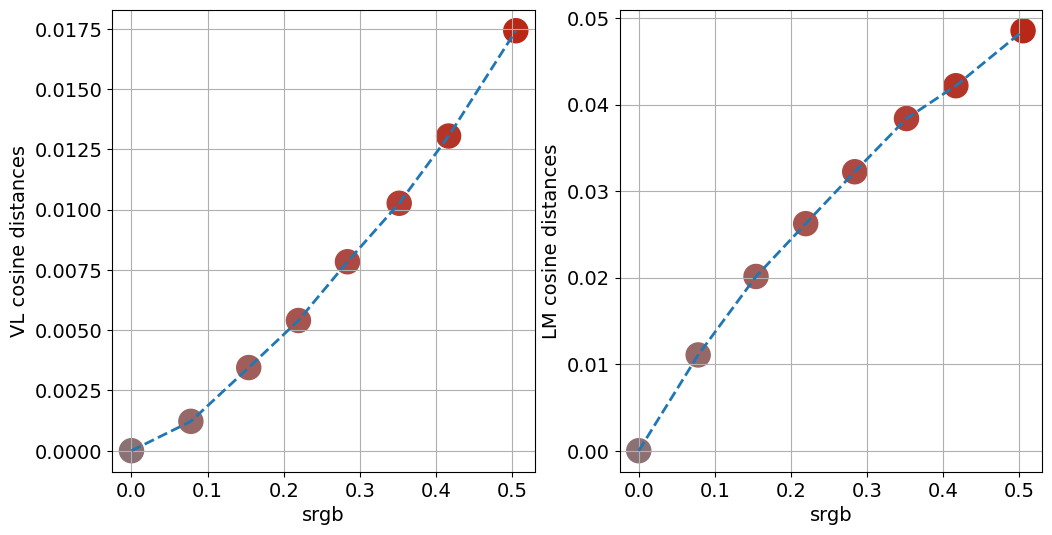

In [4]:
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)

In [1]:
data = analyzer.chain_loader.get_chain_by_specification('v', [8,9], fixed_h='7.5Y', fixed_c=8)

NameError: name 'analyzer' is not defined

In [22]:
df= pd.DataFrame(data['metadata'])

In [32]:
data['lm_pooled'][1]

array([ 3.671875 ,  9.8125   ,  0.9765625, ..., -0.8984375, -0.671875 ,
        3.671875 ], dtype=float32)

In [27]:
df

,munsell_color,xyY,RGB,H,C,V,csv_index,has_embedding
0,"H=7.5Y, C=8, V=8","(0.387, 0.419, 52.8)","(0.8248616463016255, 0.7535437316599762, 0.458...",7.5Y,8,8,458,True
1,"H=7.5Y, C=8, V=9","(0.376, 0.408, 71.5)","(0.9297000016042689, 0.8642305602142851, 0.575...",7.5Y,8,9,464,True


# Let's look on PCA of all color
### Maybe we will see the dimension of color space of VLM?

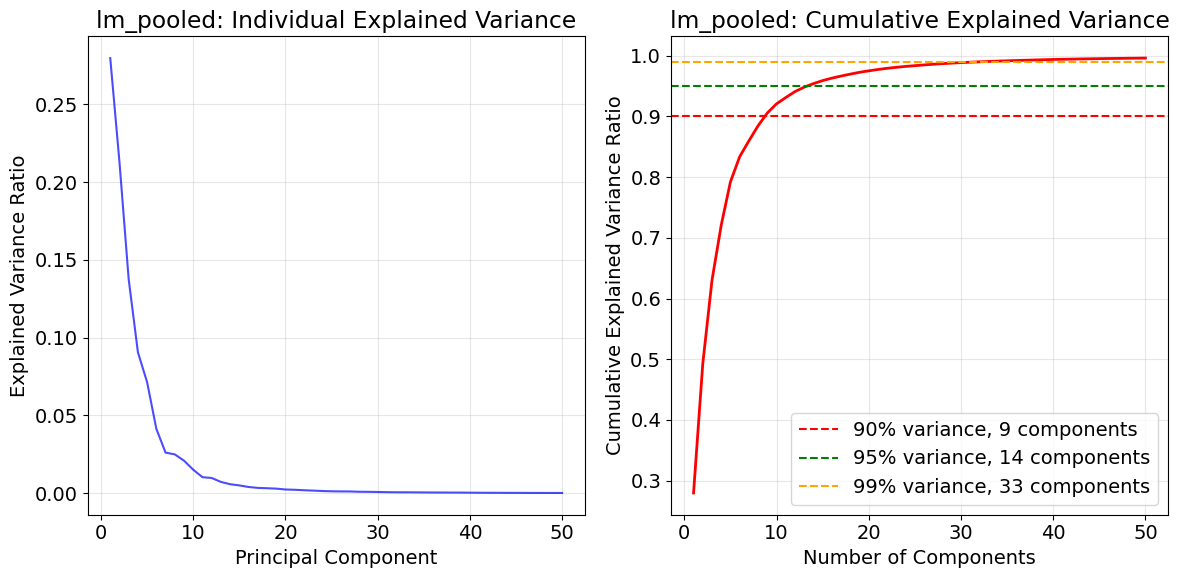

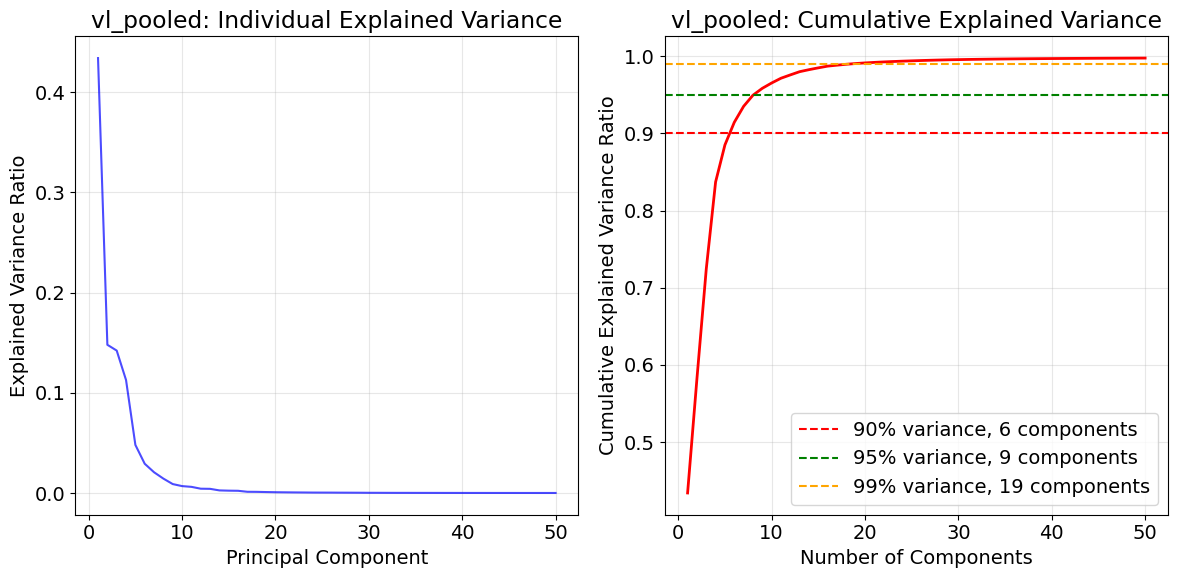

In [15]:
all_embeds = analyzer.chain_loader.get_all_available_embeddings()
pca_result = analyzer.pca_by_embeddings(all_embeds)

analyzer.plot_pca_variance(pca_result, embedding_name='lm_pooled')
analyzer.plot_pca_variance(pca_result, embedding_name='vl_pooled')

In [7]:
analyzer.chain_loader.get_list_of_chains_by_specifications(
    variables=['c'] * 6,
    values=[None, None, None, None, None, [0]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5P'],
    fixed_c=[None, None, None, None, None, None],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5,5,5,5,5,0],
)

{'metadata': [{'munsell_color': H=2.5Y, C=0, V=5,
   'xyY': (0.31, 0.316, 19.7),
   'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055),
   'H': '2.5Y',
   'C': 0,
   'V': 5,
   'csv_index': 368,
   'has_embedding': True},
  {'munsell_color': H=2.5Y, C=2, V=5,
   'xyY': (0.338, 0.342, 19.2),
   'RGB': (0.5170909286207869, 0.46581854950244356, 0.4382753231635602),
   'H': '2.5Y',
   'C': 2,
   'V': 5,
   'csv_index': 369,
   'has_embedding': True},
  {'munsell_color': H=2.5Y, C=4, V=5,
   'xyY': (0.374, 0.376, 18.3),
   'RGB': (0.5350216479674176, 0.45161224381087145, 0.351568363698517),
   'H': '2.5Y',
   'C': 4,
   'V': 5,
   'csv_index': 370,
   'has_embedding': True},
  {'munsell_color': H=2.5Y, C=6, V=5,
   'xyY': (0.423, 0.415, 17.3),
   'RGB': (0.5581106127538137, 0.432071872273621, 0.23722723688091657),
   'H': '2.5Y',
   'C': 6,
   'V': 5,
   'csv_index': 371,
   'has_embedding': True},
  {'munsell_color': H=2.5Y, C=8, V=5,
   'xyY': (0.462, 0.446, 16.6),
   '

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 37.327309
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.574455
[t-SNE] KL divergence after 2700 iterations: 0.084419
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 36.483108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.072990
[t-SNE] KL divergence after 3100 iterations: 0.134978


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:250: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


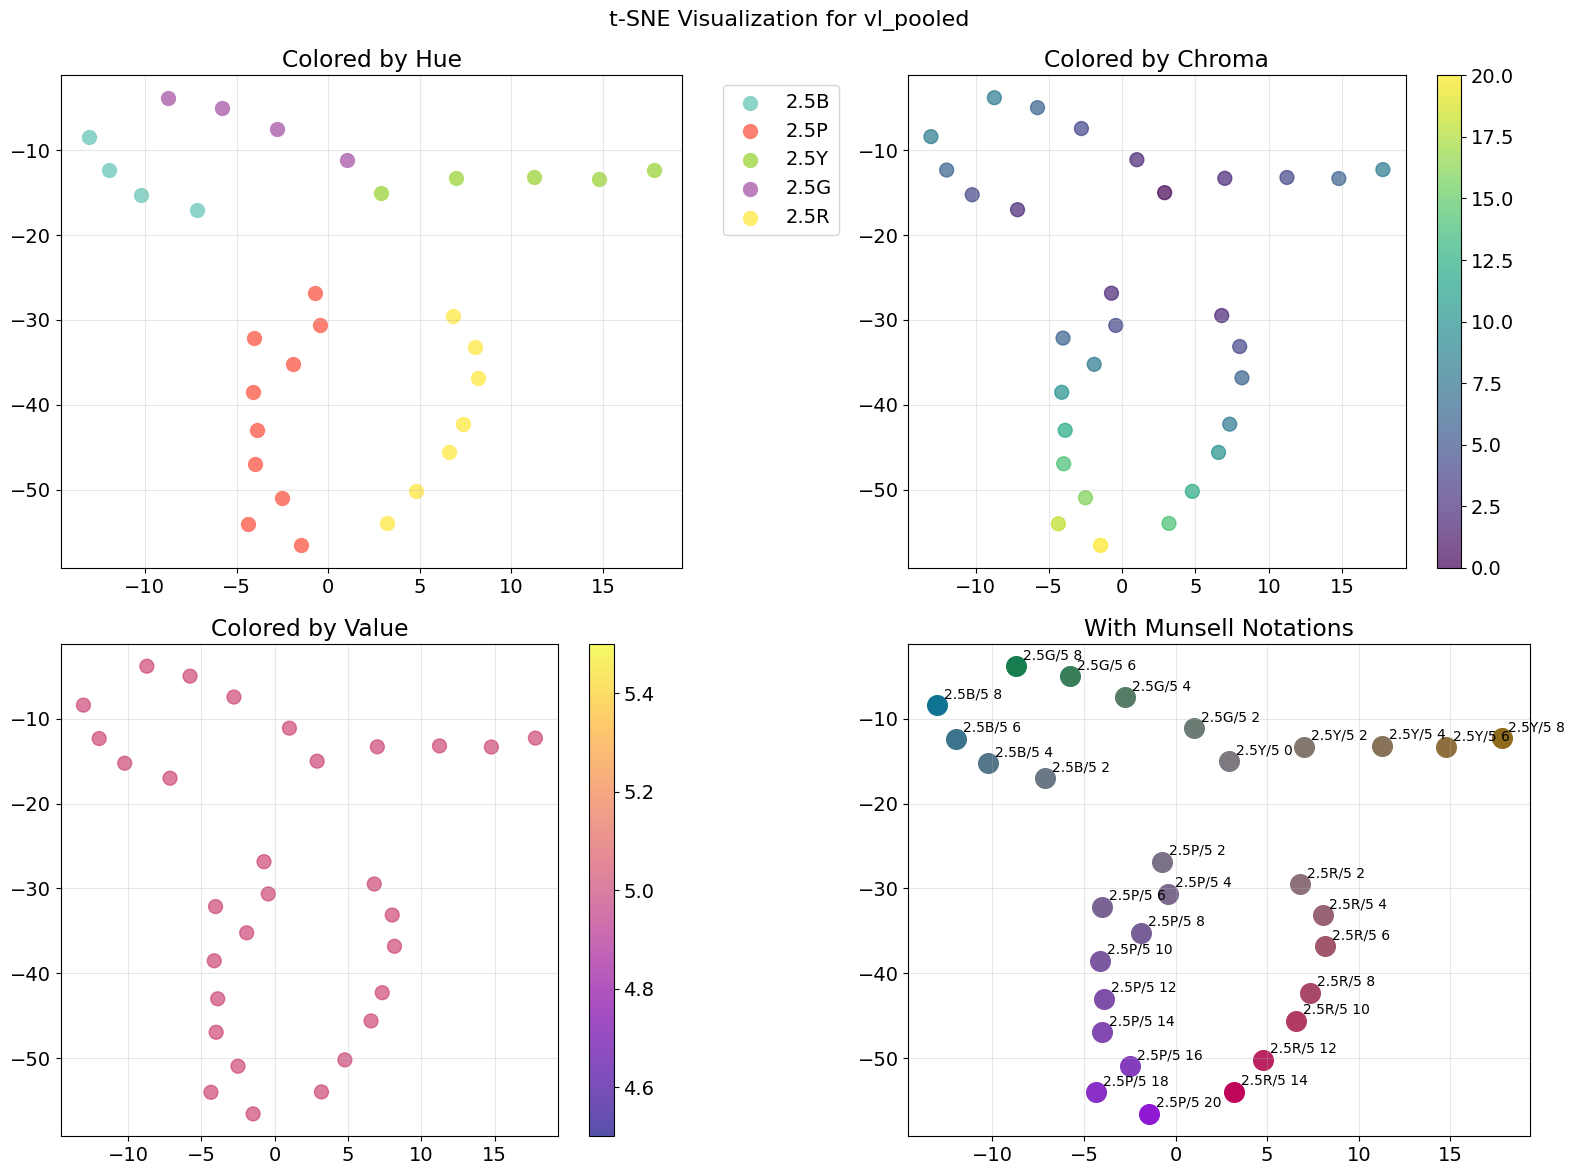

In [4]:
tsne_result = analyzer.tsne(
    variables=['c'] * 6,
    values=[None, None, None, None, None, [0]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5P'],
    fixed_c=[None, None, None, None, None, None],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5,5,5,5,5,0],
    perplexity=7
)
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')

[{'munsell_color': H=2.5Y, C=0, V=5, 'xyY': (0.31, 0.316, 19.7), 'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055), 'H': '2.5Y', 'C': 0, 'V': 5, 'csv_index': 368, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=2, V=5, 'xyY': (0.338, 0.342, 19.2), 'RGB': (0.5170909286207869, 0.46581854950244356, 0.4382753231635602), 'H': '2.5Y', 'C': 2, 'V': 5, 'csv_index': 369, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=4, V=5, 'xyY': (0.374, 0.376, 18.3), 'RGB': (0.5350216479674176, 0.45161224381087145, 0.351568363698517), 'H': '2.5Y', 'C': 4, 'V': 5, 'csv_index': 370, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=6, V=5, 'xyY': (0.423, 0.415, 17.3), 'RGB': (0.5581106127538137, 0.432071872273621, 0.23722723688091657), 'H': '2.5Y', 'C': 6, 'V': 5, 'csv_index': 371, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=8, V=5, 'xyY': (0.462, 0.446, 16.6), 'RGB': (0.5703135591228902, 0.41848860314675995, 0.1115391984676414), 'H': '2.5Y', 'C': 8, 'V': 5, 'csv_index': 

/Users/georgij/Documents/Работа/Color-MMLs/venv/lib/python3.10/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/Users/georgij/Documents/Работа/Color-MMLs/venv/lib/python3.10/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


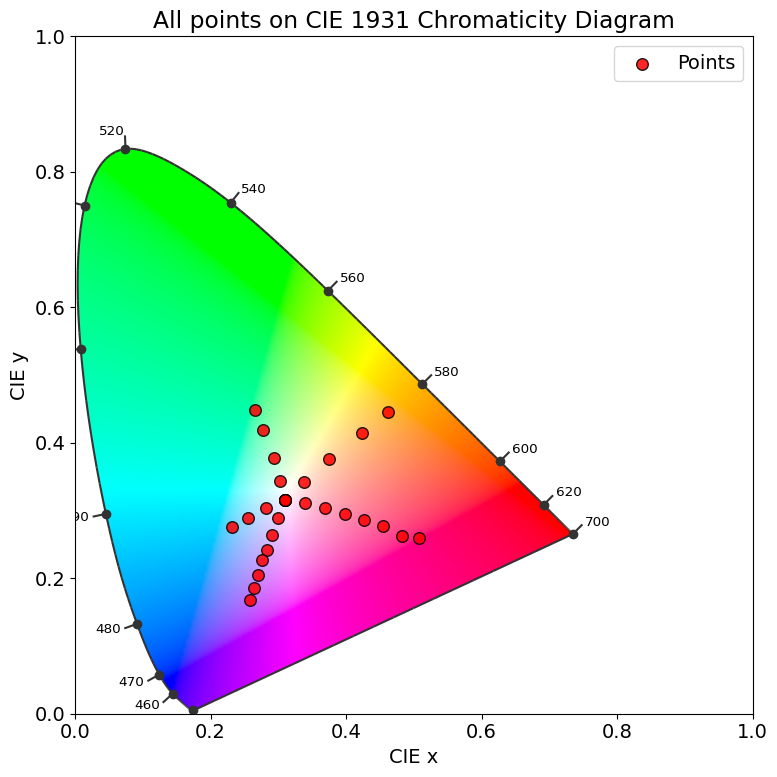

In [5]:
analyzer.plot_chromaticity_diagram(
        variables=['c'] * 5,
    values=[[0,2,4,6,8], [0,2,4,6,8], [0,2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4,6]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 25 samples in 0.000s...
[t-SNE] Computed neighbors for 25 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 25 / 25
[t-SNE] Mean sigma: 36.825141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.782024
[t-SNE] KL divergence after 2100 iterations: 0.093696
[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 25 samples in 0.000s...
[t-SNE] Computed neighbors for 25 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 25 / 25
[t-SNE] Mean sigma: 36.363288
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.396034
[t-SNE] KL divergence after 2250 iterations: 0.121031


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:250: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


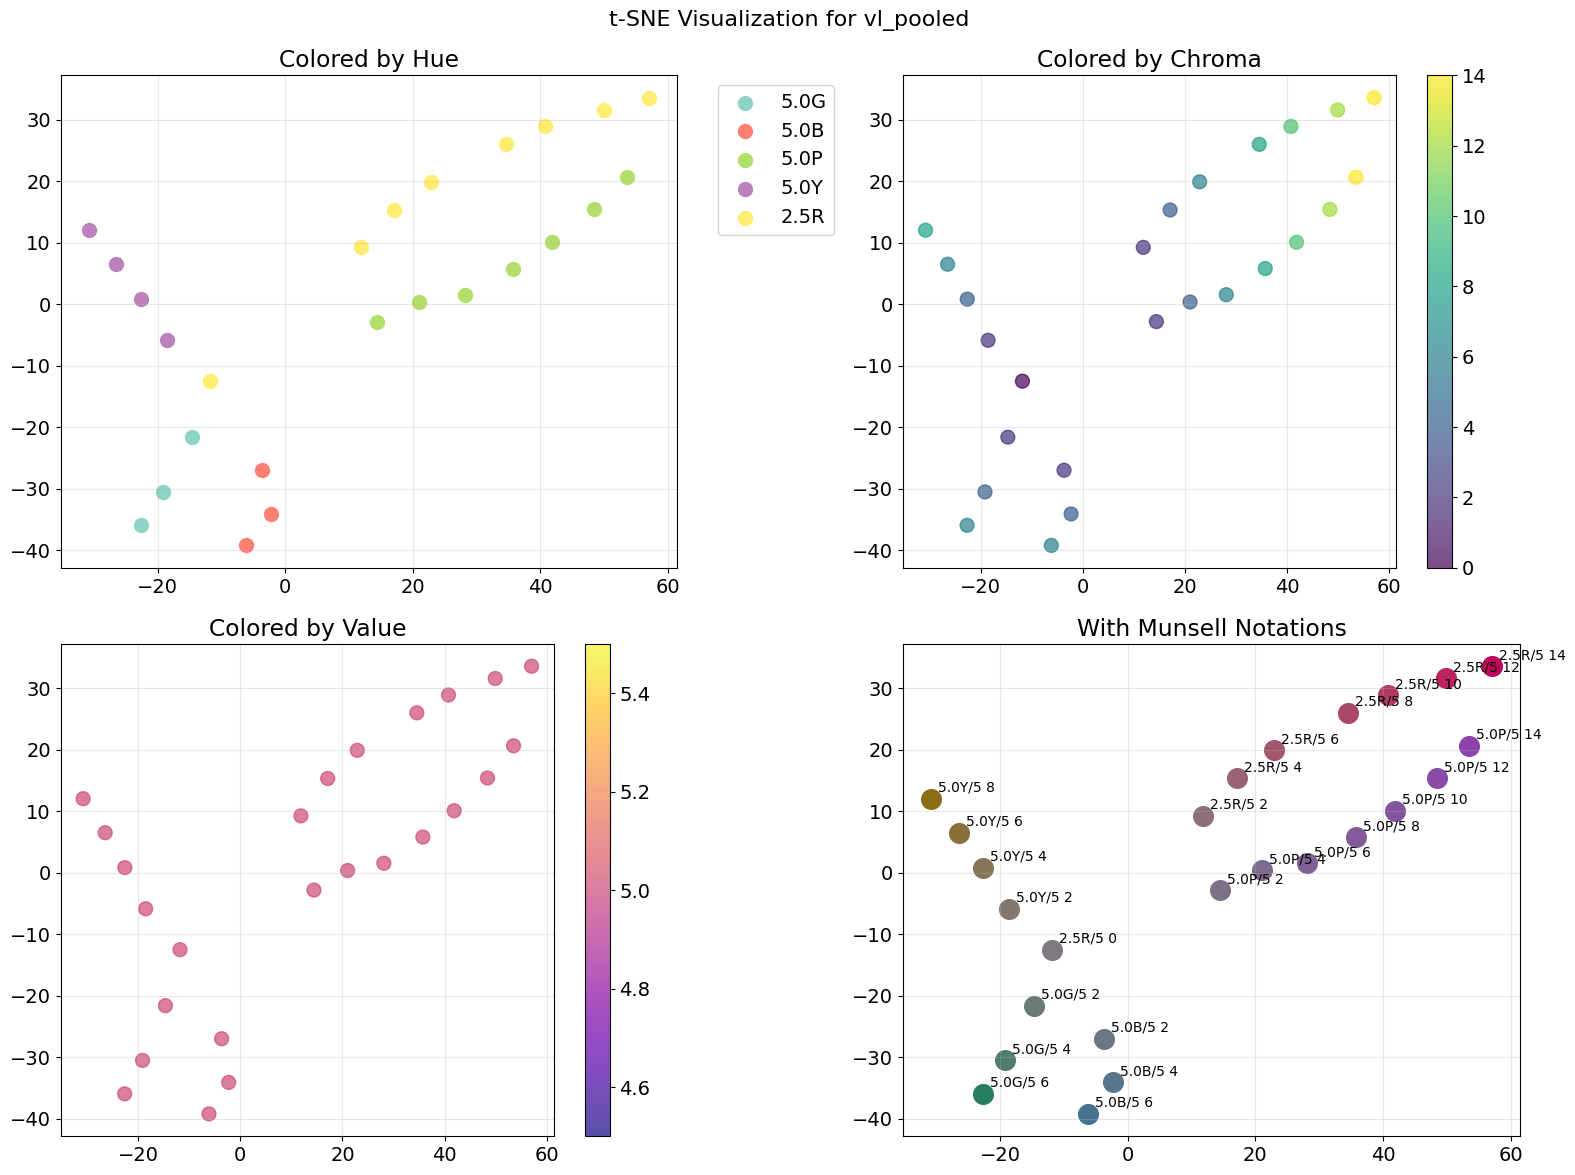

In [13]:
tsne_result = analyzer.tsne(    
    variables=['c'] * 5,
    values=[[0,2,4,6,8], [0,2,4,6,8], [0,2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4,6]],
    fixed_h=['5Y', '5G', '2.5R', '5P', '5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
    perplexity=6)
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 35.428508
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.091003
[t-SNE] KL divergence after 2150 iterations: 0.091042
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 35.664139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.692654
[t-SNE] KL divergence after 2150 iterations: 0.171121


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:250: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


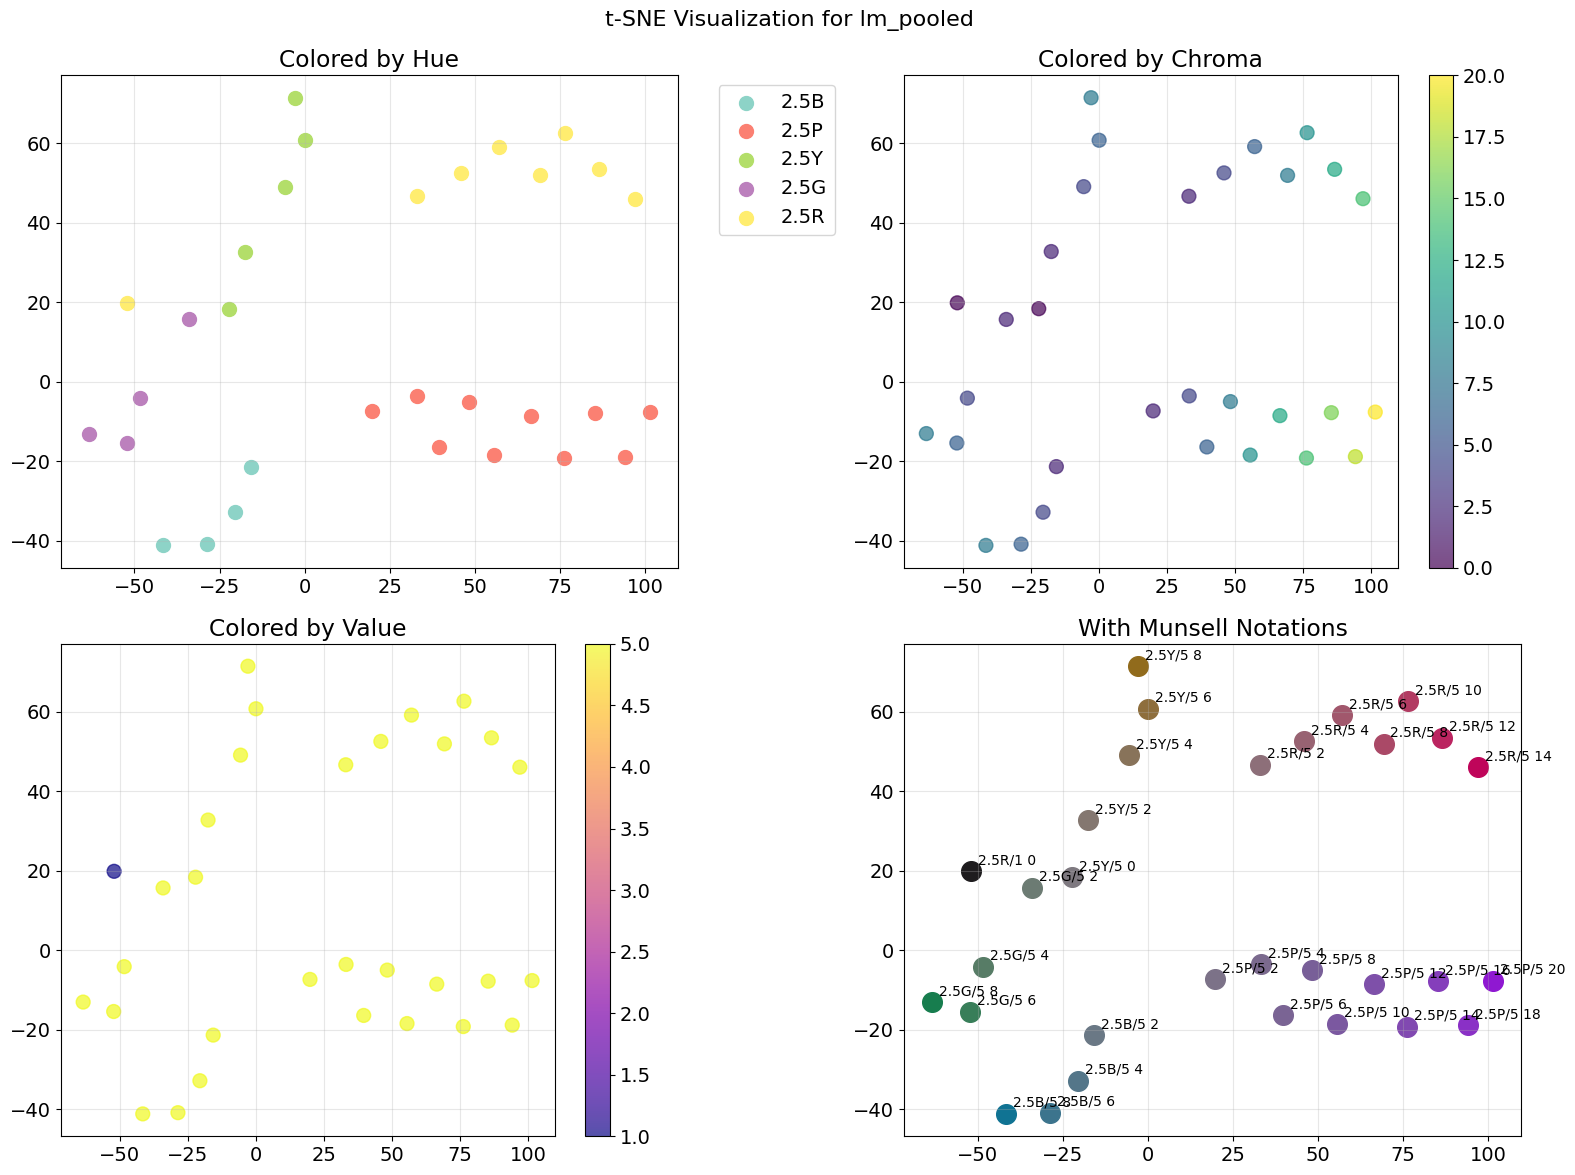

In [7]:
tsne_result = analyzer.tsne(    
    variables=['c', 'c', 'c', 'c', 'c', 'v'],
    values=[None, None, None, None, None, [1]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5R'],
    fixed_c=[None, None, None, None, None, 0],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5, 5, 5, 5, 5, None],
    perplexity=7
    )
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 24.678267
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.453194
[t-SNE] KL divergence after 1750 iterations: 0.574342
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 25.991915
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.546120
[t-SNE] KL divergence after 1950 iterations: 0.352920


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:250: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


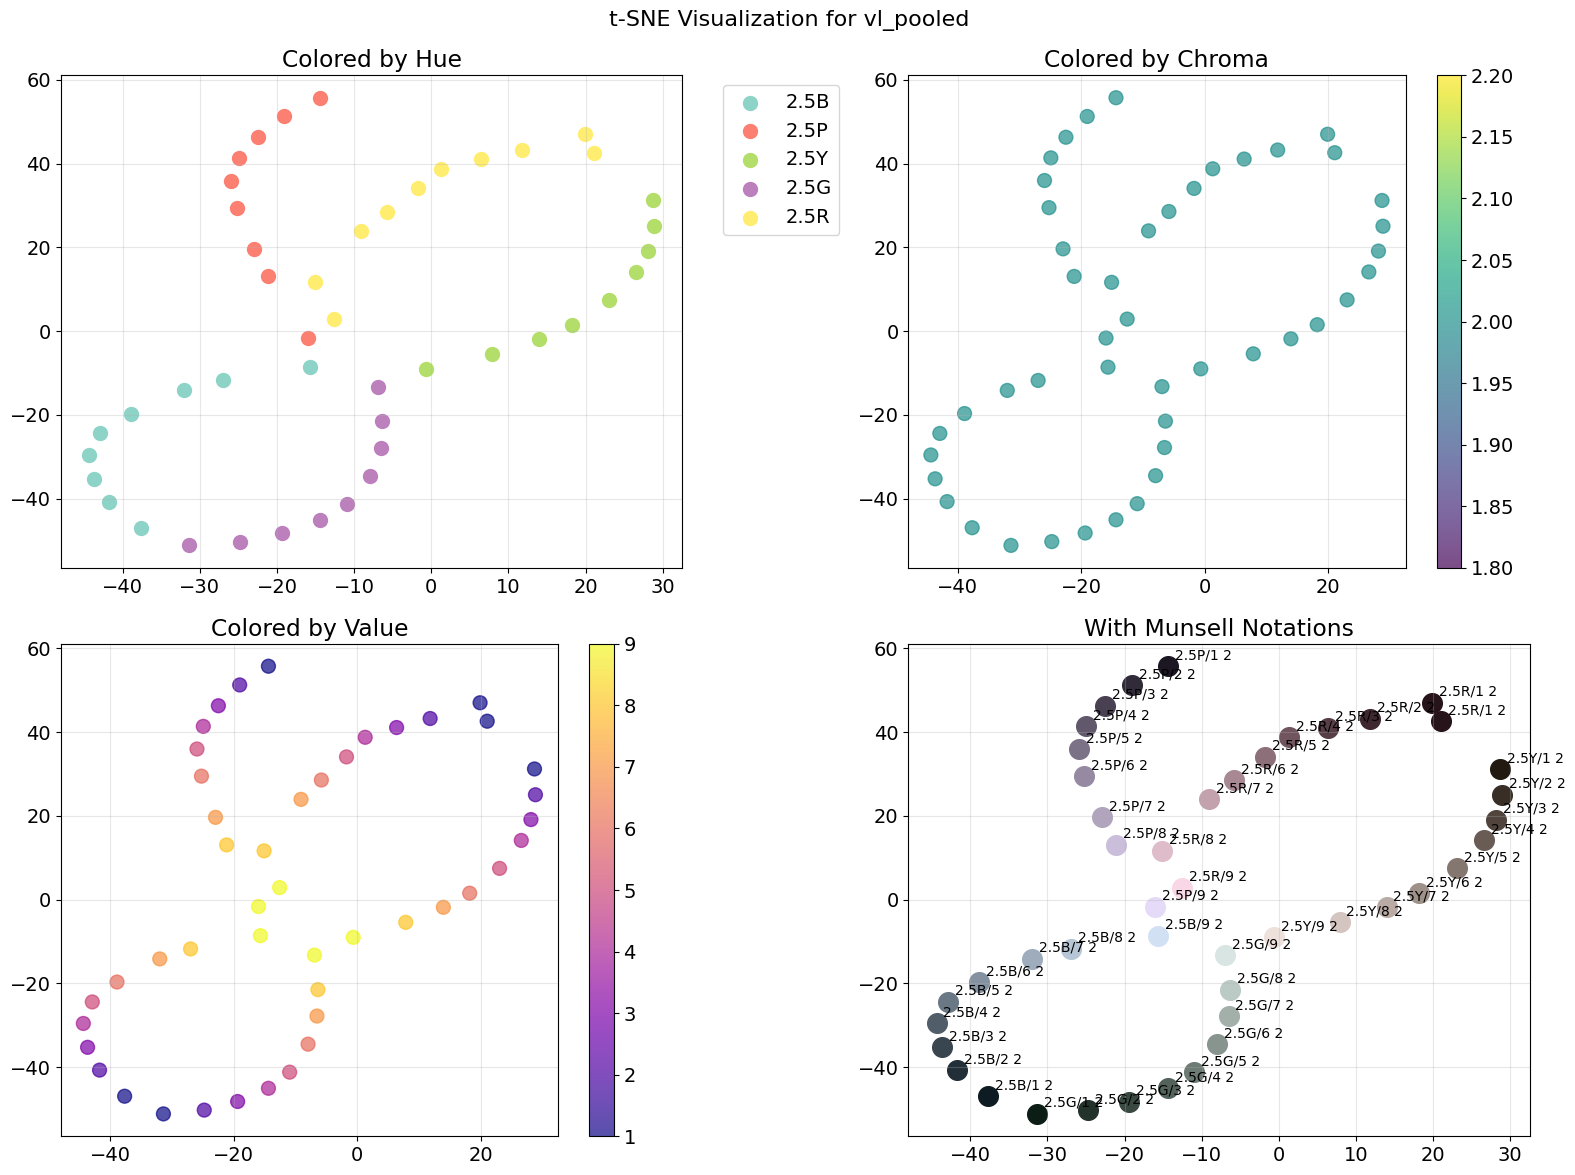

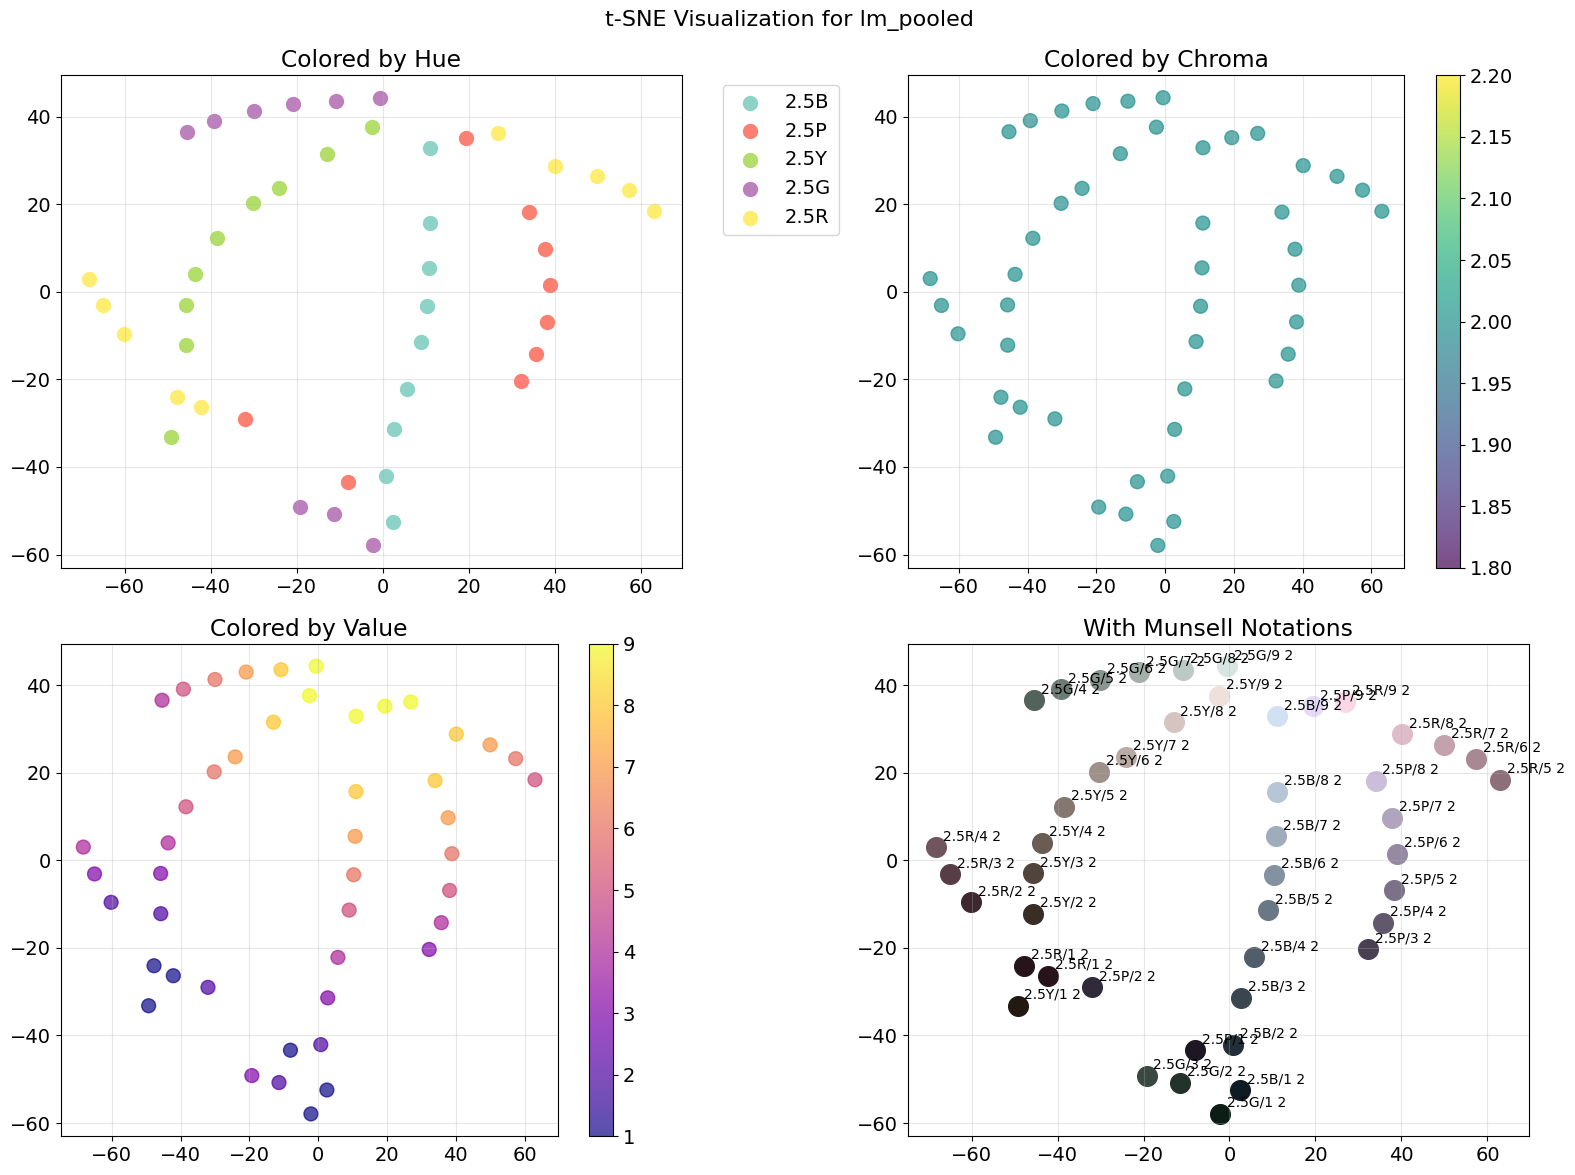

In [8]:
tsne_result = analyzer.tsne(    
    variables=['v', 'v', 'v', 'v', 'v', 'v'],
    values=[None, None, None, None, None, [1]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5R'],
    fixed_c=[2, 2, 2, 2, 2, 2],      # <-- fixed chroma for the first, None for the second
    fixed_v=[None, None, None, None, None, None],
    perplexity=5
    )
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')